In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [2]:
import time

In [3]:
import pandas as pd


# Load the text file into a DataFrame
df1 = pd.read_csv('df_final_demo.txt')
df2 = pd.read_csv('df_final_experiment_clients.txt')
df3 = pd.read_csv('df_final_web_data_pt_1.txt')
df4 = pd.read_csv('df_final_web_data_pt_2.txt')

In [4]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [114]:
df3['client_id'].nunique()

58391

In [115]:
print(df1.head(10))
print(df1.info())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   
5    3727881             5.0              71.0      30.5     U        2.0   
6     272934             5.0              66.0      58.5     U        2.0   
7     388801            30.0             361.0      57.5     M        5.0   
8     285619            30.0             369.0      67.5     M        2.0   
9    8198645            15.0             189.0      54.5     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79        

In [116]:
has_null = df1.isnull().any().any()
has_null

null_counts = df1.isna().sum()
null_counts

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [117]:
# df1 = df1.drop(['year_numberic', 'year_numeric'], axis=1)
# df1


In [118]:
columns_to_check = [
    'clnt_tenure_yr', 
    'clnt_tenure_mnth', 
    'clnt_age', 
    'gendr', 
    'num_accts', 
    'bal', 
    'calls_6_mnth', 
    'logons_6_mnth'
]

# Creating a new category for the missing value
for col in columns_to_check:
    df1[f'{col}_status'] = np.where(df1[col].isnull(), 'Missing', 'Provided')

# Filling the empty values with a new placeholder
for col in columns_to_check:
    df1[col] = df1[col].fillna('Unknown')

# Print relevant columns and their statuses
for col in columns_to_check:
    print(df1[[col, f'{col}_status']])

      clnt_tenure_yr clnt_tenure_yr_status
0                6.0              Provided
1                7.0              Provided
2                5.0              Provided
3               16.0              Provided
4               12.0              Provided
...              ...                   ...
70604            4.0              Provided
70605           12.0              Provided
70606           16.0              Provided
70607           21.0              Provided
70608           21.0              Provided

[70609 rows x 2 columns]
      clnt_tenure_mnth clnt_tenure_mnth_status
0                 73.0                Provided
1                 94.0                Provided
2                 64.0                Provided
3                198.0                Provided
4                145.0                Provided
...                ...                     ...
70604             56.0                Provided
70605            148.0                Provided
70606            198.0             

In [119]:
# df1.drop_duplicates(inplace=True)

In [120]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_status,clnt_tenure_mnth_status,clnt_age_status,gendr_status,num_accts_status,bal_status,calls_6_mnth_status,logons_6_mnth_status
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
1,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided


In [121]:
has_null = df1.isnull().any().any()
has_null

null_counts = df1.isnull().sum()
null_counts

client_id                  0
clnt_tenure_yr             0
clnt_tenure_mnth           0
clnt_age                   0
gendr                      0
num_accts                  0
bal                        0
calls_6_mnth               0
logons_6_mnth              0
clnt_tenure_yr_status      0
clnt_tenure_mnth_status    0
clnt_age_status            0
gendr_status               0
num_accts_status           0
bal_status                 0
calls_6_mnth_status        0
logons_6_mnth_status       0
dtype: int64

### Didn't show any kind of sign showing the null value. Check with the teacher


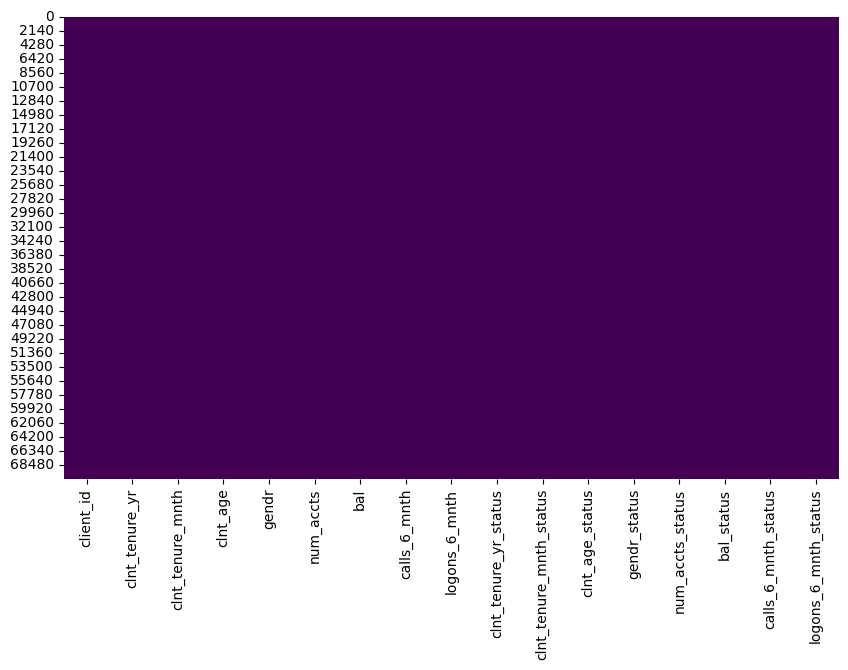

In [122]:
# Creating a heatmap to see the missin values in the data

plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.show()

In [123]:
has_null = df2.isnull().any().any()
has_null
null_counts = df2.isnull().sum()
null_counts


client_id        0
Variation    20109
dtype: int64

In [124]:
df2 = df2.fillna('Missing')
df2

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,Missing
70605,8788427,Missing
70606,266828,Missing
70607,1266421,Missing


In [125]:

# df2 = pd.DataFrame({'Variaton': ['Test', 'Control', 'Missing','Test', 'Control']})


# df2['Test'] = df2[df2['Variation'] == 'Test'].astype(int)
# df2['Control'] = df2(df2['Variation'] == 'Control').astype(int)
# df2['Missing'] = df2(df2['Variation'] == 'Missing').astype(int)

In [126]:
has_null = df3.isnull().any().any()
has_null

null_counts = df3.isnull().sum()
null_counts

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [127]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_status,clnt_tenure_mnth_status,clnt_age_status,gendr_status,num_accts_status,bal_status,calls_6_mnth_status,logons_6_mnth_status
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
1,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Provided,Provided,Provided,Provided,Provided,Provided,Provided,Provided


In [128]:
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [129]:
df3.head()


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [153]:
concated_df = pd.concat([df3, df4])
concated_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [154]:
concated_df['client_id'].nunique()

120157

In [160]:
# dfs = [df1, df2, concated_df]

# combined_df = pd.concat(dfs, axis=0, ignore_index=True)
# final_df = combined_df.drop_duplicates(subset='client_id', keep='last')


In [162]:
file_paths = [df1, df2, concated_df]

combined_df = reduce(lambda left, right: pd.merge(left, right, on='client_id'), file_paths)

In [164]:
combined_df['client_id'].nunique()

70609

In [165]:
combined_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_status,...,gendr_status,num_accts_status,bal_status,calls_6_mnth_status,logons_6_mnth_status,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Provided,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Provided,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Provided,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Provided,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Provided,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [166]:
has_null = combined_df.isnull().any().any()
has_null

null_counts = combined_df.isnull().sum()
null_counts

client_id                  0
clnt_tenure_yr             0
clnt_tenure_mnth           0
clnt_age                   0
gendr                      0
num_accts                  0
bal                        0
calls_6_mnth               0
logons_6_mnth              0
clnt_tenure_yr_status      0
clnt_tenure_mnth_status    0
clnt_age_status            0
gendr_status               0
num_accts_status           0
bal_status                 0
calls_6_mnth_status        0
logons_6_mnth_status       0
Variation                  0
visitor_id                 0
visit_id                   0
process_step               0
date_time                  0
dtype: int64

In [167]:
combined_df.dtypes

client_id                   int64
clnt_tenure_yr             object
clnt_tenure_mnth           object
clnt_age                   object
gendr                      object
num_accts                  object
bal                        object
calls_6_mnth               object
logons_6_mnth              object
clnt_tenure_yr_status      object
clnt_tenure_mnth_status    object
clnt_age_status            object
gendr_status               object
num_accts_status           object
bal_status                 object
calls_6_mnth_status        object
logons_6_mnth_status       object
Variation                  object
visitor_id                 object
visit_id                   object
process_step               object
date_time                  object
dtype: object

In [23]:
# updated_df = pd.DataFrame(combined_df)

# # Check data types before conversion
# print("Data types before conversion:")
# print(updated_df.dtypes)

# # checking unique values in relevant columns
# print("\nUnique values in num_accts:")
# print(updated_df['num_accts'].unique())
# print("\nUnique values in clnt_tenure_yr:")
# print(updated_df['clnt_tenure_yr'].unique())
# print("\nUnique values in clnt_tenure_mnth:")
# print(updated_df['clnt_tenure_mnth'].unique())
# print("\nUnique values in clnt_age:")
# print(updated_df['clnt_age'].unique())

# # Convert relevant columns to numeric types (if they are strings)
# updated_df['num_accts'] = pd.to_numeric(updated_df['num_accts'], errors='coerce')
# updated_df['clnt_tenure_yr'] = pd.to_numeric(updated_df['clnt_tenure_yr'], errors='coerce')
# updated_df['clnt_tenure_mnth'] = pd.to_numeric(updated_df['clnt_tenure_mnth'], errors='coerce')
# updated_df['clnt_age'] = pd.to_numeric(updated_df['clnt_age'], errors='coerce')

# # Check for NaN values after conversion
# print("\nCheck for NaN values after conversion:")
# print(updated_df.isna().sum())

# # Handle NaN values if necessary (e.g., drop rows with NaN)
# updated_df.dropna(subset=['num_accts', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age'], inplace=True)

# # Creating ne columns based on the value of an existing column
# updated_df['Client_type'] = updated_df['num_accts'].apply(lambda x: 'Primary' if x > 1 else 'Secondary')

# # Checking if the users are new or long-standing
# current_year = pd.Timestamp.now().year
# updated_df['Client_status'] = updated_df.apply(lambda row: 
#     'New' if (row['clnt_tenure_yr'] < 3) or (row['clnt_tenure_yr'] == 3 and row['clnt_tenure_mnth'] == 0) 
#     else 'Long-Standing', axis=1)

# # Categorizing the users based on age 
# age_limit = 30
# updated_df['Age_category'] = updated_df['clnt_age'].apply(lambda x: 'Younger' if x < age_limit else 'Older')

# # Filtering the primary clients
# primary_clients = updated_df[updated_df['Client_type'] == 'Primary']

# # Printing results
# print("Primary Clients: ")
# print(primary_clients[['clnt_age', 'clnt_tenure_yr', 
#                       'clnt_tenure_mnth', 'Age_category', 
#                       'Client_status']])


Data types before conversion:
client_id                  float64
clnt_tenure_yr              object
clnt_tenure_mnth            object
clnt_age                    object
gendr                       object
num_accts                   object
bal                         object
calls_6_mnth                object
logons_6_mnth               object
clnt_tenure_yr_status       object
clnt_tenure_mnth_status     object
clnt_age_status             object
gendr_status                object
num_accts_status            object
bal_status                  object
calls_6_mnth_status         object
logons_6_mnth_status        object
Variaton                    object
visitor_id                  object
visit_id                    object
process_step                object
date_time                   object
dtype: object

Unique values in num_accts:
[2.0 5.0 3.0 4.0 6.0 7.0 'Unknown' 1.0 8.0 nan]

Unique values in clnt_tenure_yr:
[6.0 7.0 5.0 16.0 12.0 30.0 15.0 8.0 4.0 3.0 10.0 11.0 13.0 14.0 19.0 18.0


In [178]:
# updated_df = updated_df.fillna('Missing')
# updated_df.head()

In [168]:
# updated_df = pd.DataFrame(combined_df)

# # Check data types before conversion
# print("Data types before conversion:")
# print(updated_df.dtypes)

# # checking unique values in relevant columns
# print("\nUnique values in num_accts:")
# print(updated_df['num_accts'].unique())
# print("\nUnique values in clnt_tenure_yr:")
# print(updated_df['clnt_tenure_yr'].unique())
# print("\nUnique values in clnt_tenure_mnth:")
# print(updated_df['clnt_tenure_mnth'].unique())
# print("\nUnique values in clnt_age:")
# print(updated_df['clnt_age'].unique())

# # Convert relevant columns to numeric types (if they are strings)
# updated_df['num_accts'] = pd.to_numeric(updated_df['num_accts'], errors='coerce')
# updated_df['clnt_tenure_yr'] = pd.to_numeric(updated_df['clnt_tenure_yr'], errors='coerce')
# updated_df['clnt_tenure_mnth'] = pd.to_numeric(updated_df['clnt_tenure_mnth'], errors='coerce')
# updated_df['clnt_age'] = pd.to_numeric(updated_df['clnt_age'], errors='coerce')

# # Check for NaN values after conversion
# print("\nCheck for NaN values after conversion:")
# print(updated_df.isna().sum())

# # Handle NaN values if necessary (e.g., drop rows with NaN)
# updated_df.dropna(subset=['num_accts', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age'], inplace=True)

# # Creating ne columns based on the value of an existing column
# updated_df['Client_type'] = updated_df['num_accts'].apply(lambda x: 'Primary' if x > 1 else 'Secondary')

# # Checking if the users are new or long-standing
# current_year = pd.Timestamp.now().year
# updated_df['Client_status'] = updated_df.apply(lambda row: 
#     'New' if (row['clnt_tenure_yr'] < 3) or (row['clnt_tenure_yr'] == 3 and row['clnt_tenure_mnth'] == 0) 
#     else 'Long-Standing', axis=1)

# # Categorizing the users based on age 
# age_limit = 30
# updated_df['Age_category'] = updated_df['clnt_age'].apply(lambda x: 'Younger' if x < age_limit else 'Older')

# # Filtering the primary clients
# primary_clients = updated_df[updated_df['Client_type'] == 'Primary']

# # Printing results
# print("Primary Clients: ")
# print(primary_clients[['clnt_age', 'clnt_tenure_yr', 
#                       'clnt_tenure_mnth', 'Age_category', 
#                       'Client_status']])


In [171]:
combined_df['Test'] = (combined_df['Variation'] == 'Test').astype(int)
combined_df['Control'] = (combined_df['Variation'] == 'Control').astype(int)
combined_df['Missing_variation'] = (combined_df['Variation'] == 'Missing_variation').astype(int)

print(combined_df['Test'].value_counts())
print(combined_df['Control'].value_counts())
combined_df

Test
0    271984
1    177847
Name: count, dtype: int64
Control
0    306369
1    143462
Name: count, dtype: int64


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_status,...,calls_6_mnth_status,logons_6_mnth_status,Variation,visitor_id,visit_id,process_step,date_time,Test,Control,Missing_variation
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,1,0,0
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,1,0,0
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,1,0,0
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,1,0,0
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Provided,...,Provided,Provided,Missing,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,0,0,0
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Provided,...,Provided,Provided,Missing,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,0,0,0
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Provided,...,Provided,Provided,Missing,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,0,0,0
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Provided,...,Provided,Provided,Missing,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,0,0,0


In [172]:
combined_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_yr_status,...,calls_6_mnth_status,logons_6_mnth_status,Variation,visitor_id,visit_id,process_step,date_time,Test,Control,Missing_variation
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,1,0,0
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,1,0,0
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,1,0,0
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,1,0,0
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Provided,...,Provided,Provided,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,1,0,0


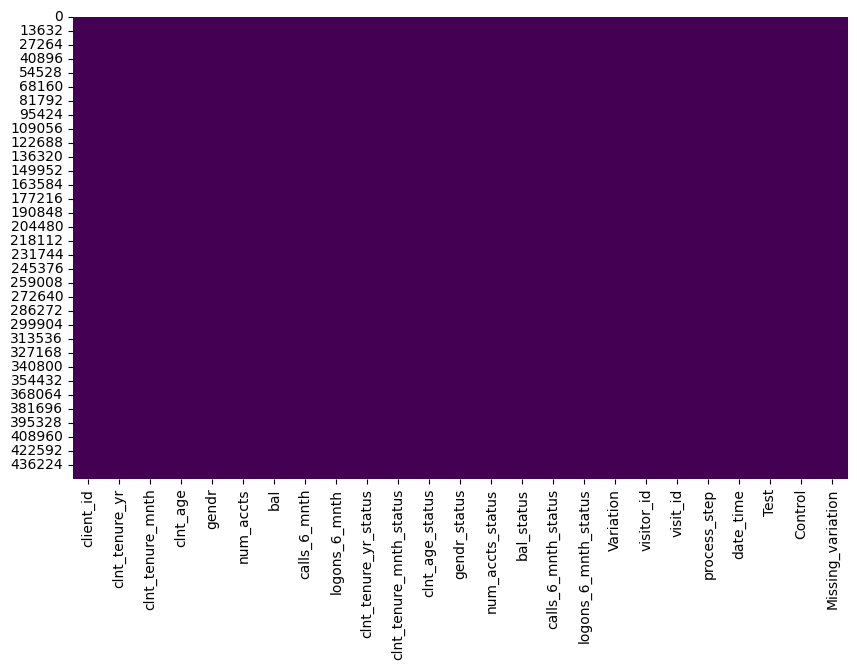

In [173]:
# Creating a heatmap to see the missin values in the data

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [177]:
combined_df['client_id'].nunique()

70609

In [176]:
combined_df.to_csv('real01.csv', index=False)

In [66]:
# updated_df.to_csv('main.csv', index=False)